In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from m2_utilities.data.load_data import load_trajectories

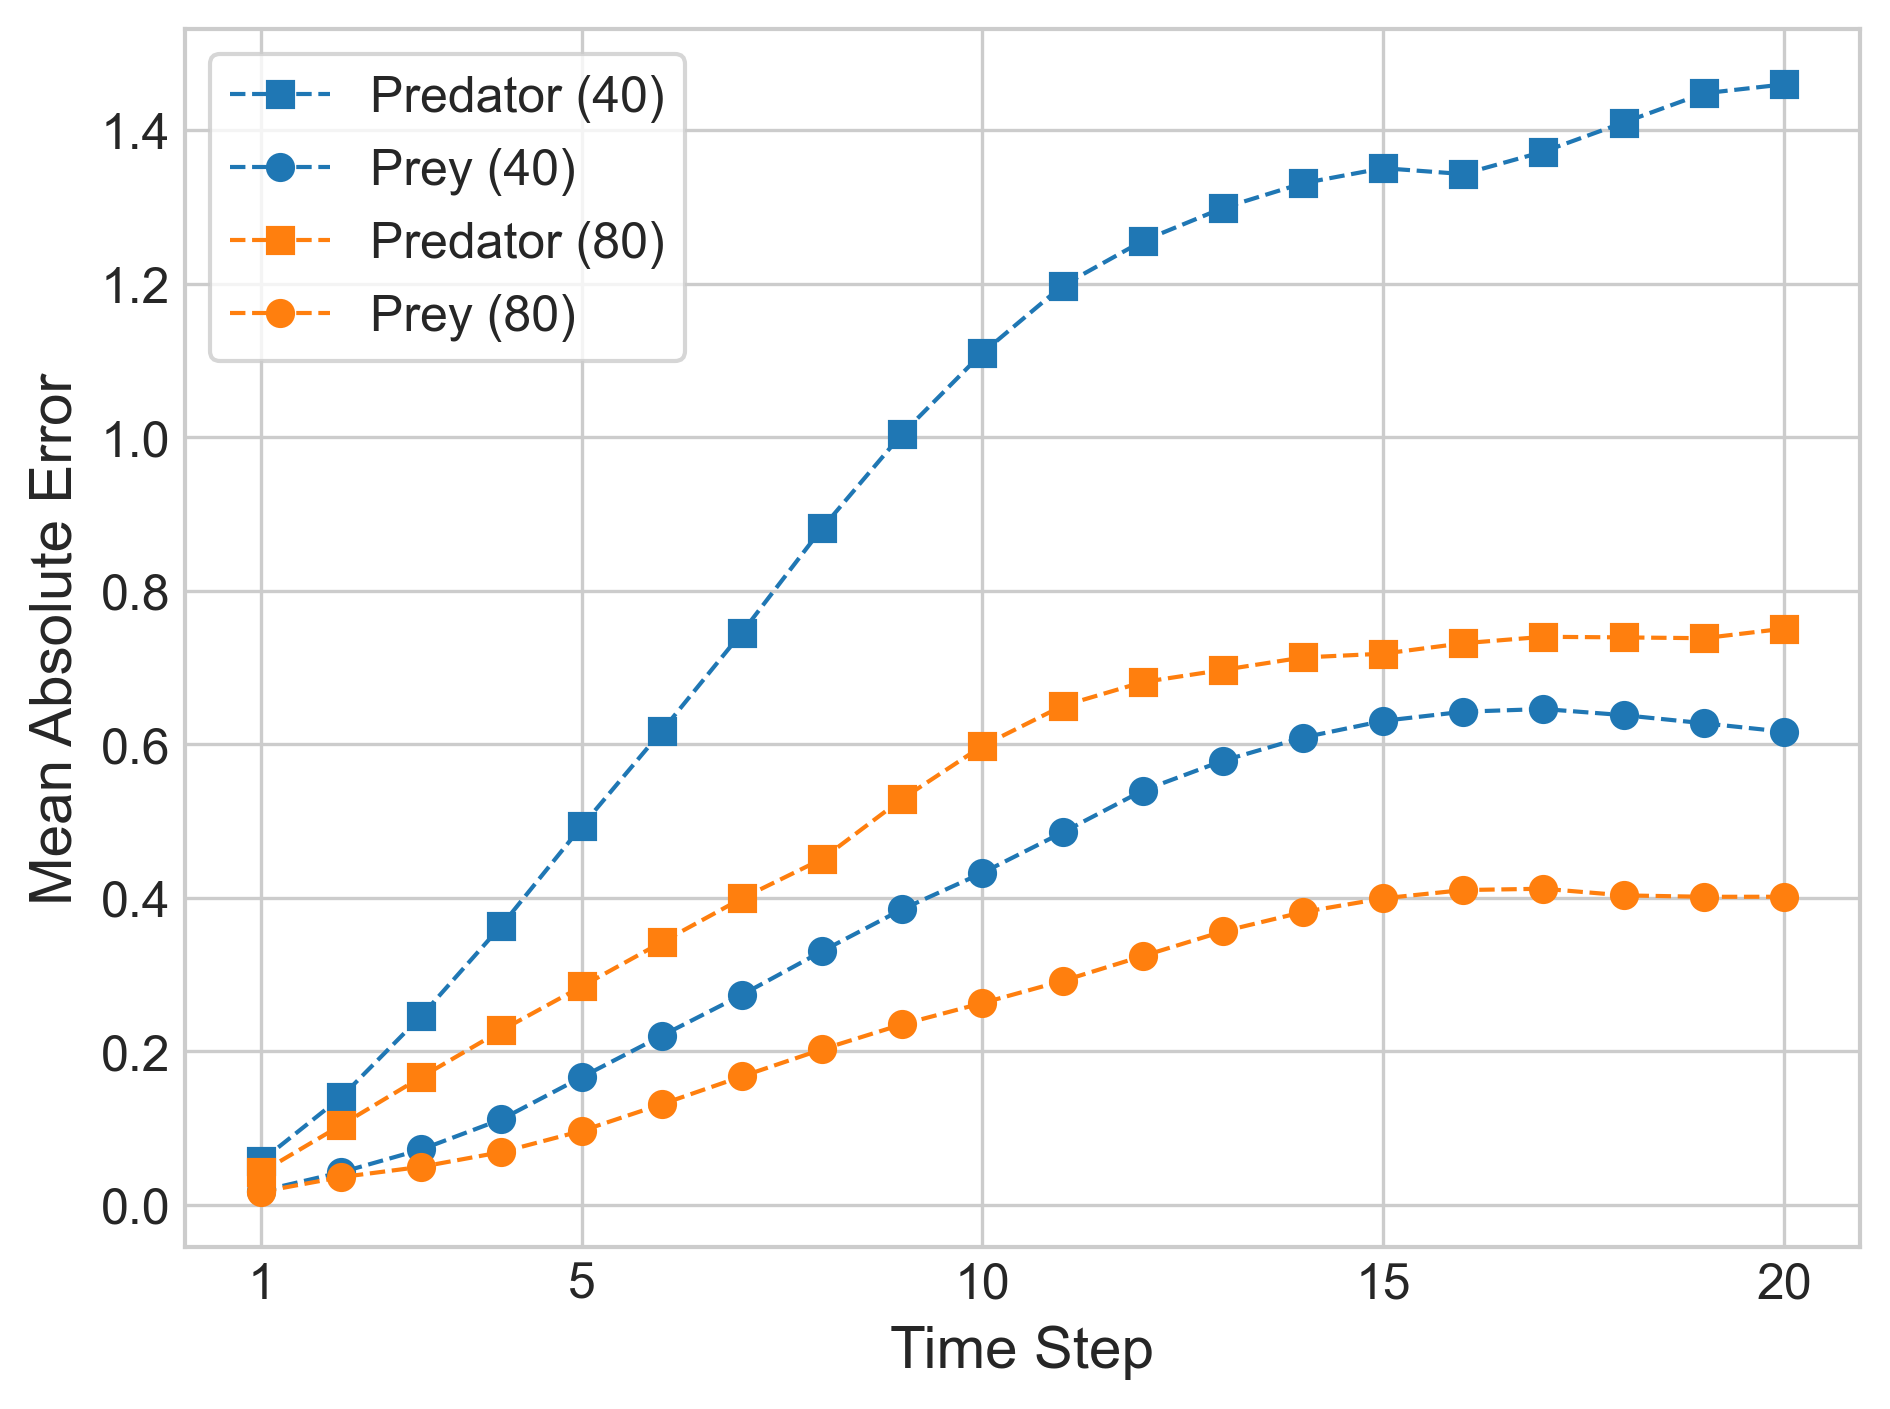

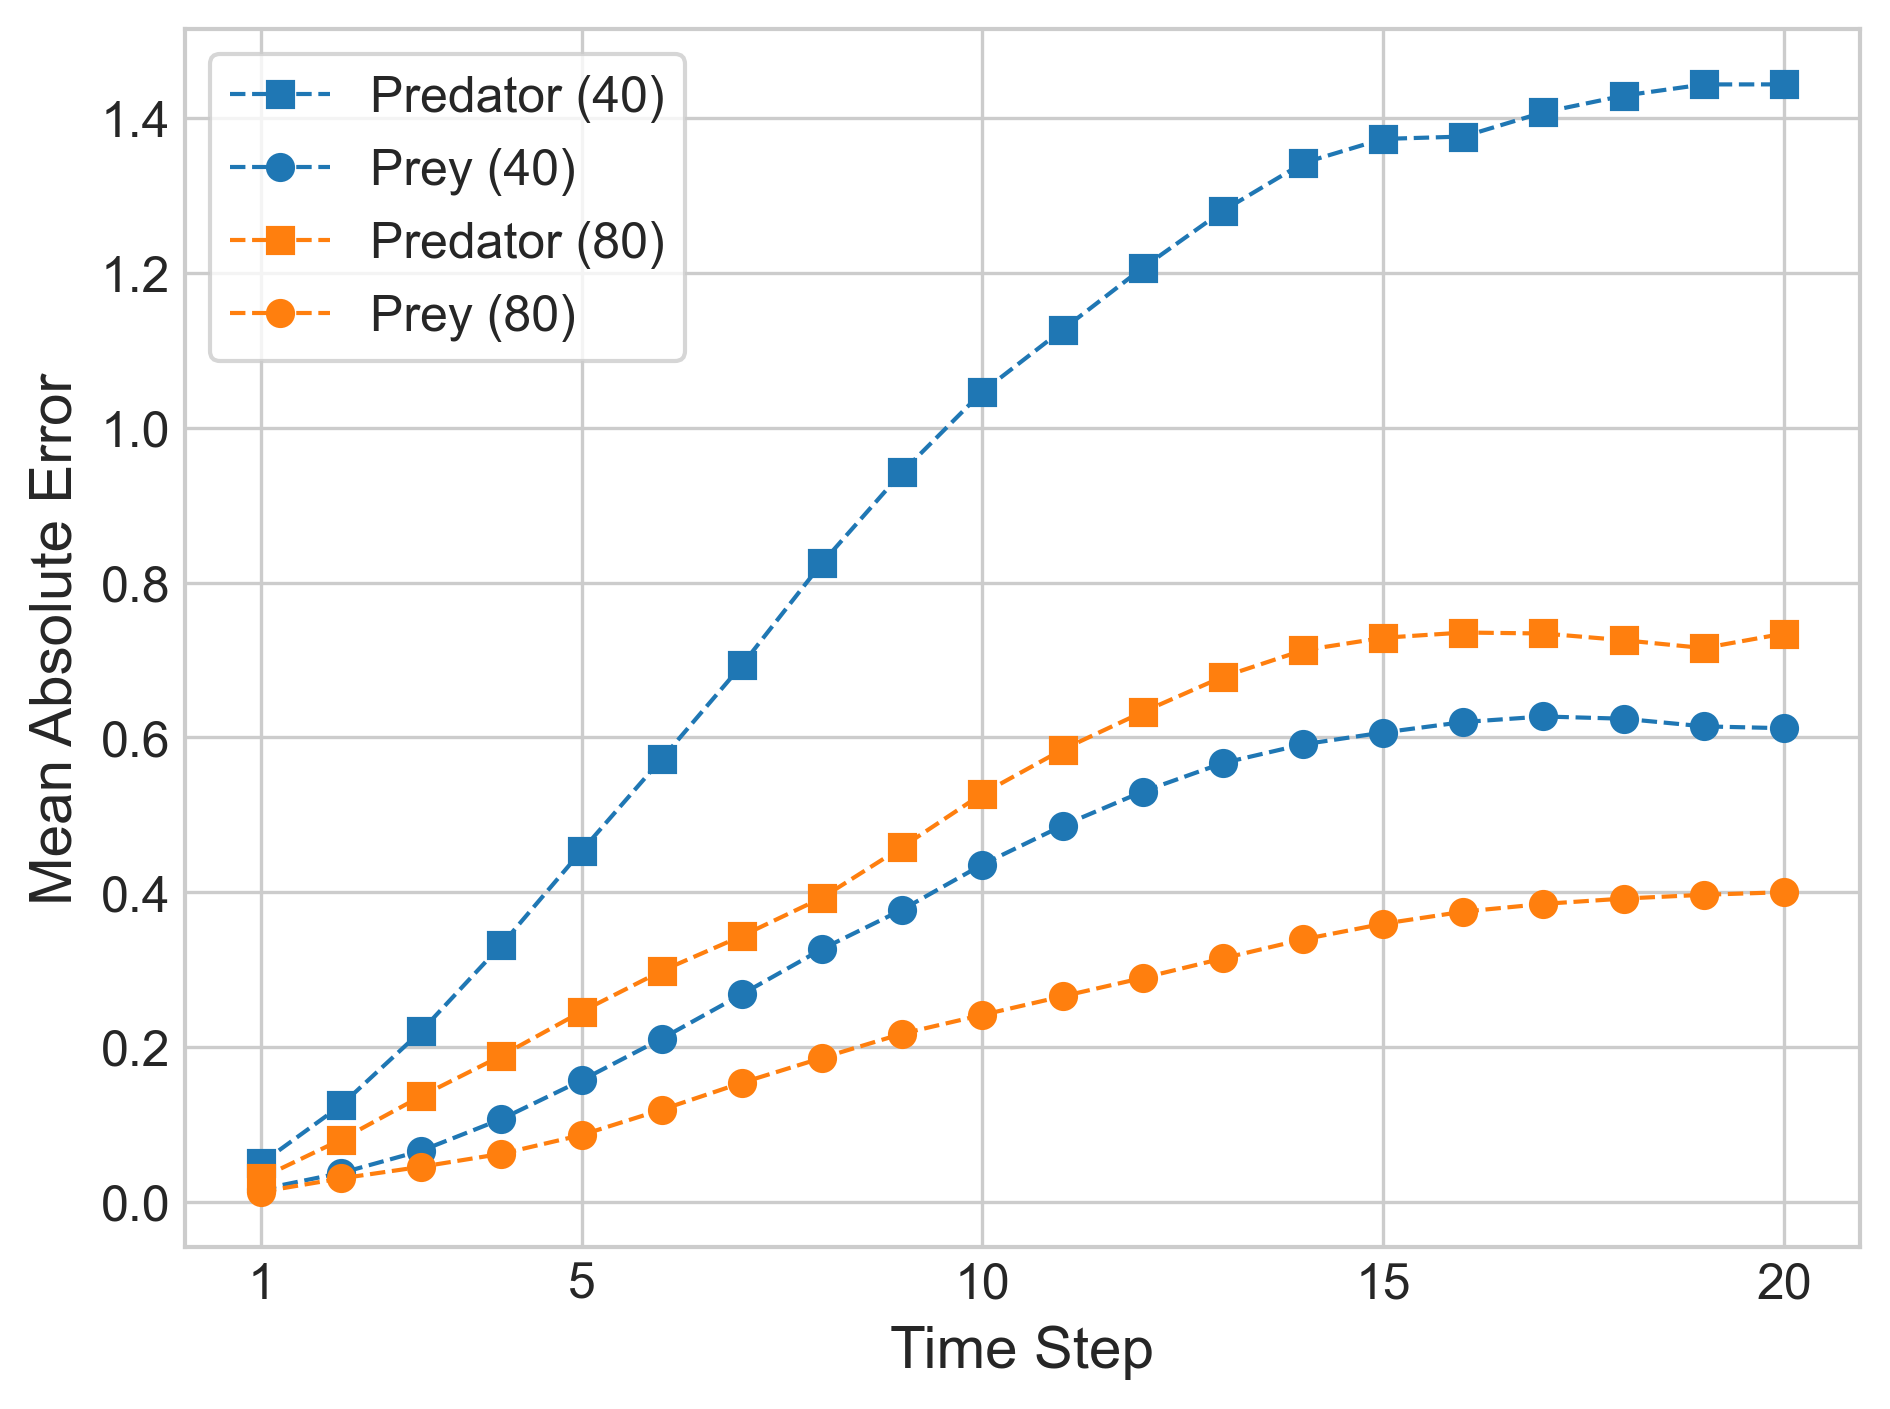

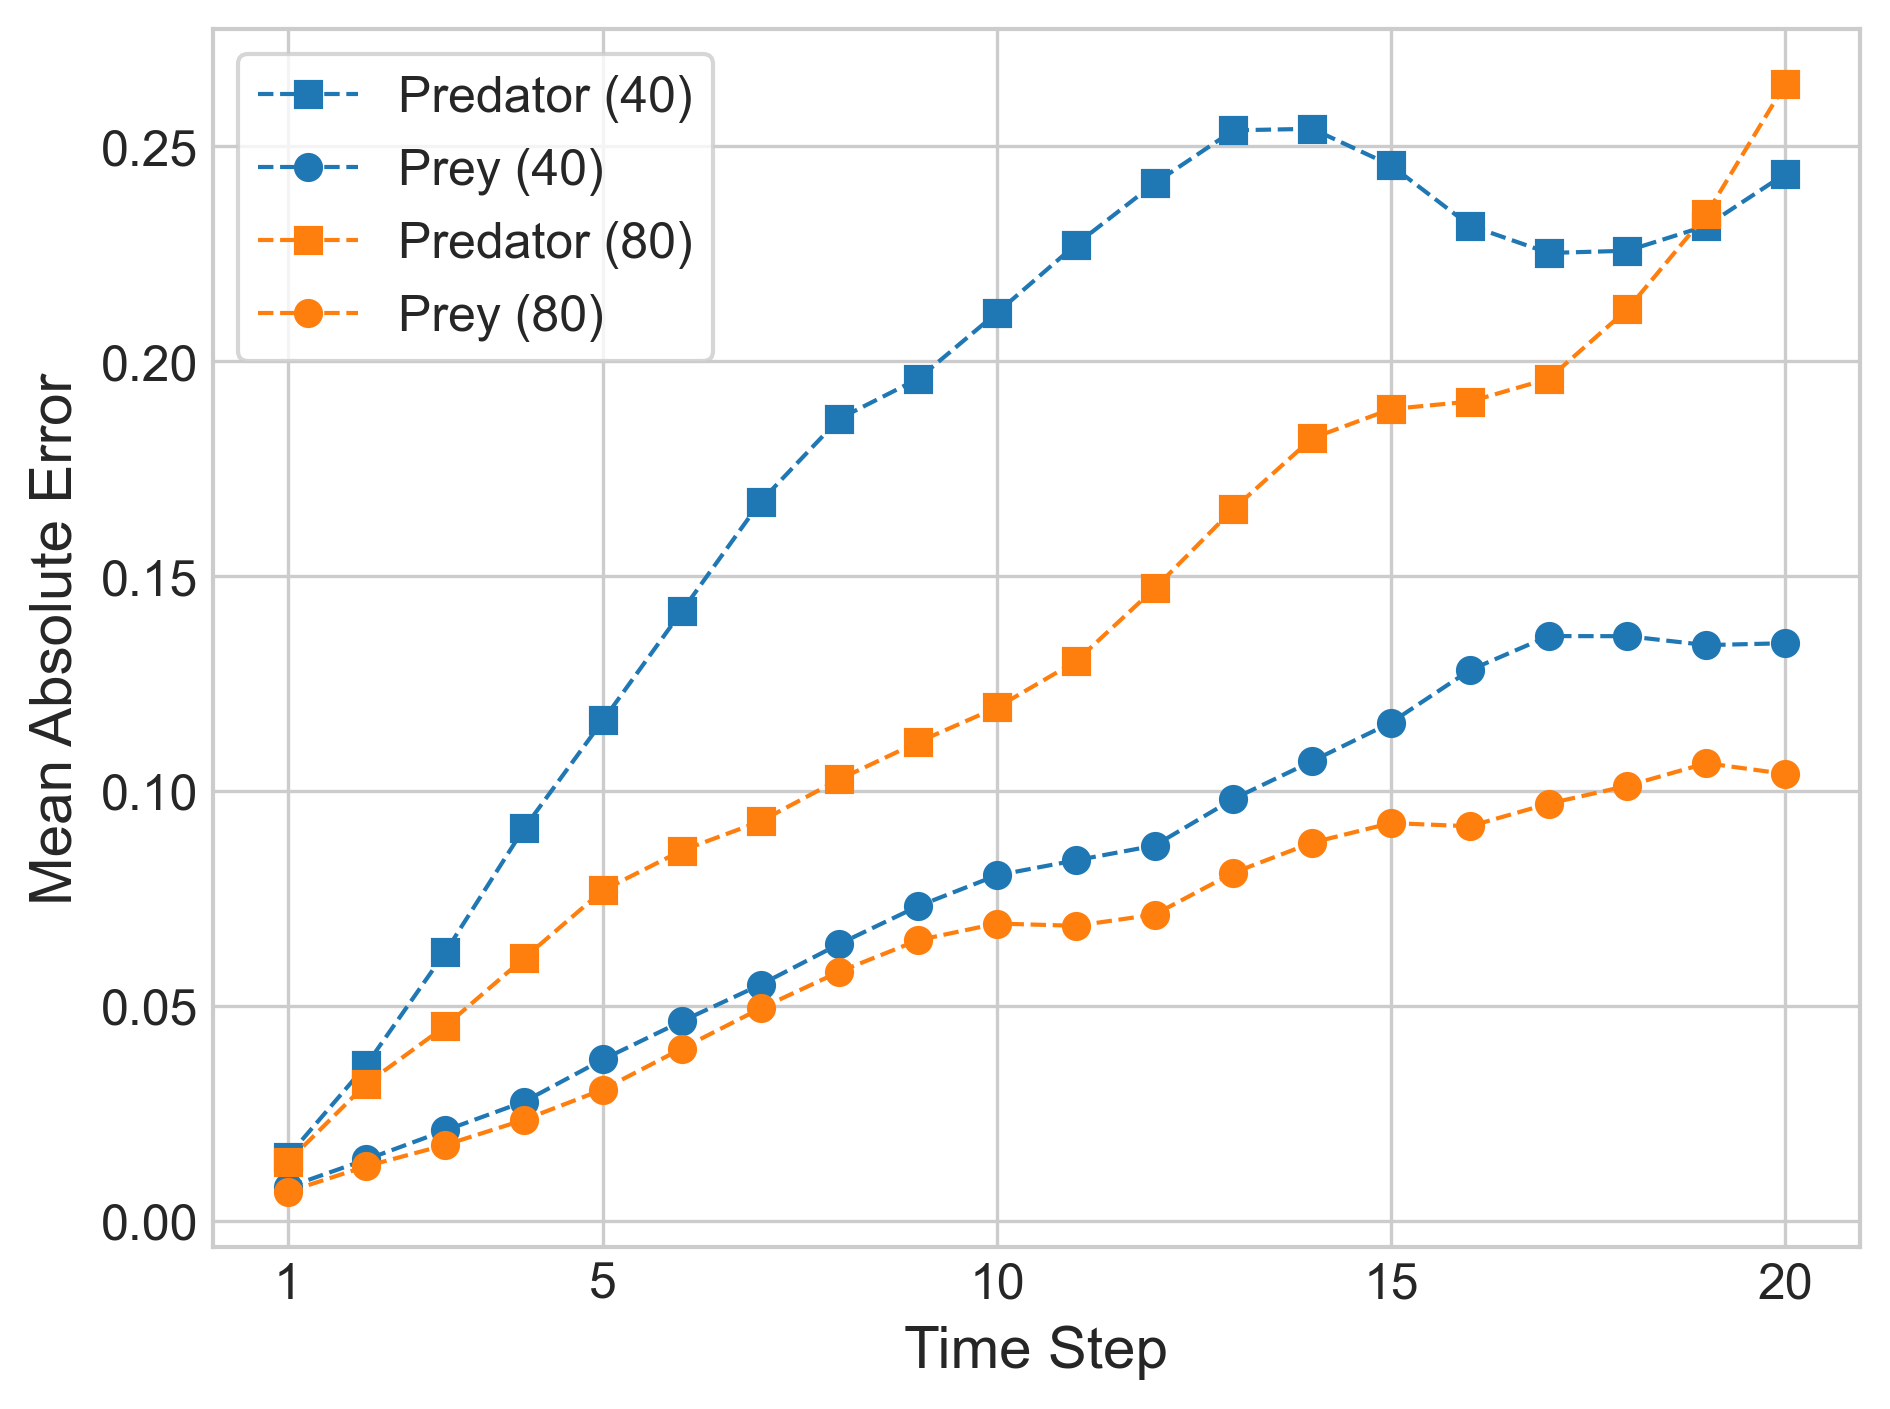

: 

In [ ]:
def plot_maes(pred_40, prey_40, pred_80, prey_80):
    """
    Plot mean absolute errors for predator and prey predictions at both 40 and 80
    context length.
    """
    x = torch.linspace(1, 20, 20)

    # Set global style (optional, consistent with modern publication aesthetics)
    plt.style.use("seaborn-v0_8-whitegrid")
    plt.figure(dpi=300)

    # Plot lines with customized styles
    plt.plot(x, pred_40, label="Predator (40)", color="#1f77b4", marker="s", linestyle='--', linewidth=1, markersize=6)
    plt.plot(x, prey_40, label="Prey (40)", color="#1f77b4", marker="o", linestyle='--', linewidth=1, markersize=6)
    plt.plot(x, pred_80, label="Predator (80)", color="#ff7f0e", marker="s", linestyle='--', linewidth=1, markersize=6)
    plt.plot(x, prey_80, label="Prey (80)", color="#ff7f0e", marker="o", linestyle='--', linewidth=1, markersize=6)

    # Titles and labels
    plt.xlabel("Time Step", fontsize=14)
    plt.ylabel("Mean Absolute Error", fontsize=14)

    # Tick styling
    plt.xticks(ticks=[1, 5, 10, 15, 20], labels=[1, 5, 10, 15, 20], fontsize=12)
    plt.yticks(fontsize=12)

    # Legend
    plt.legend(fontsize=12, title_fontsize=13, frameon=True)

    plt.tight_layout()
    plt.show()


for i in [0, 1, 13]:
    pred_40 = torch.load(f"../output_data/config_{i}/pred_maes_40.pt")
    prey_40 = torch.load(f"../output_data/config_{i}/prey_maes_40.pt")
    pred_80 = torch.load(f"../output_data/config_{i}/pred_maes_80.pt")
    prey_80 = torch.load(f"../output_data/config_{i}/prey_maes_80.pt")
    plot_maes(pred_40, prey_40, pred_80, prey_80)

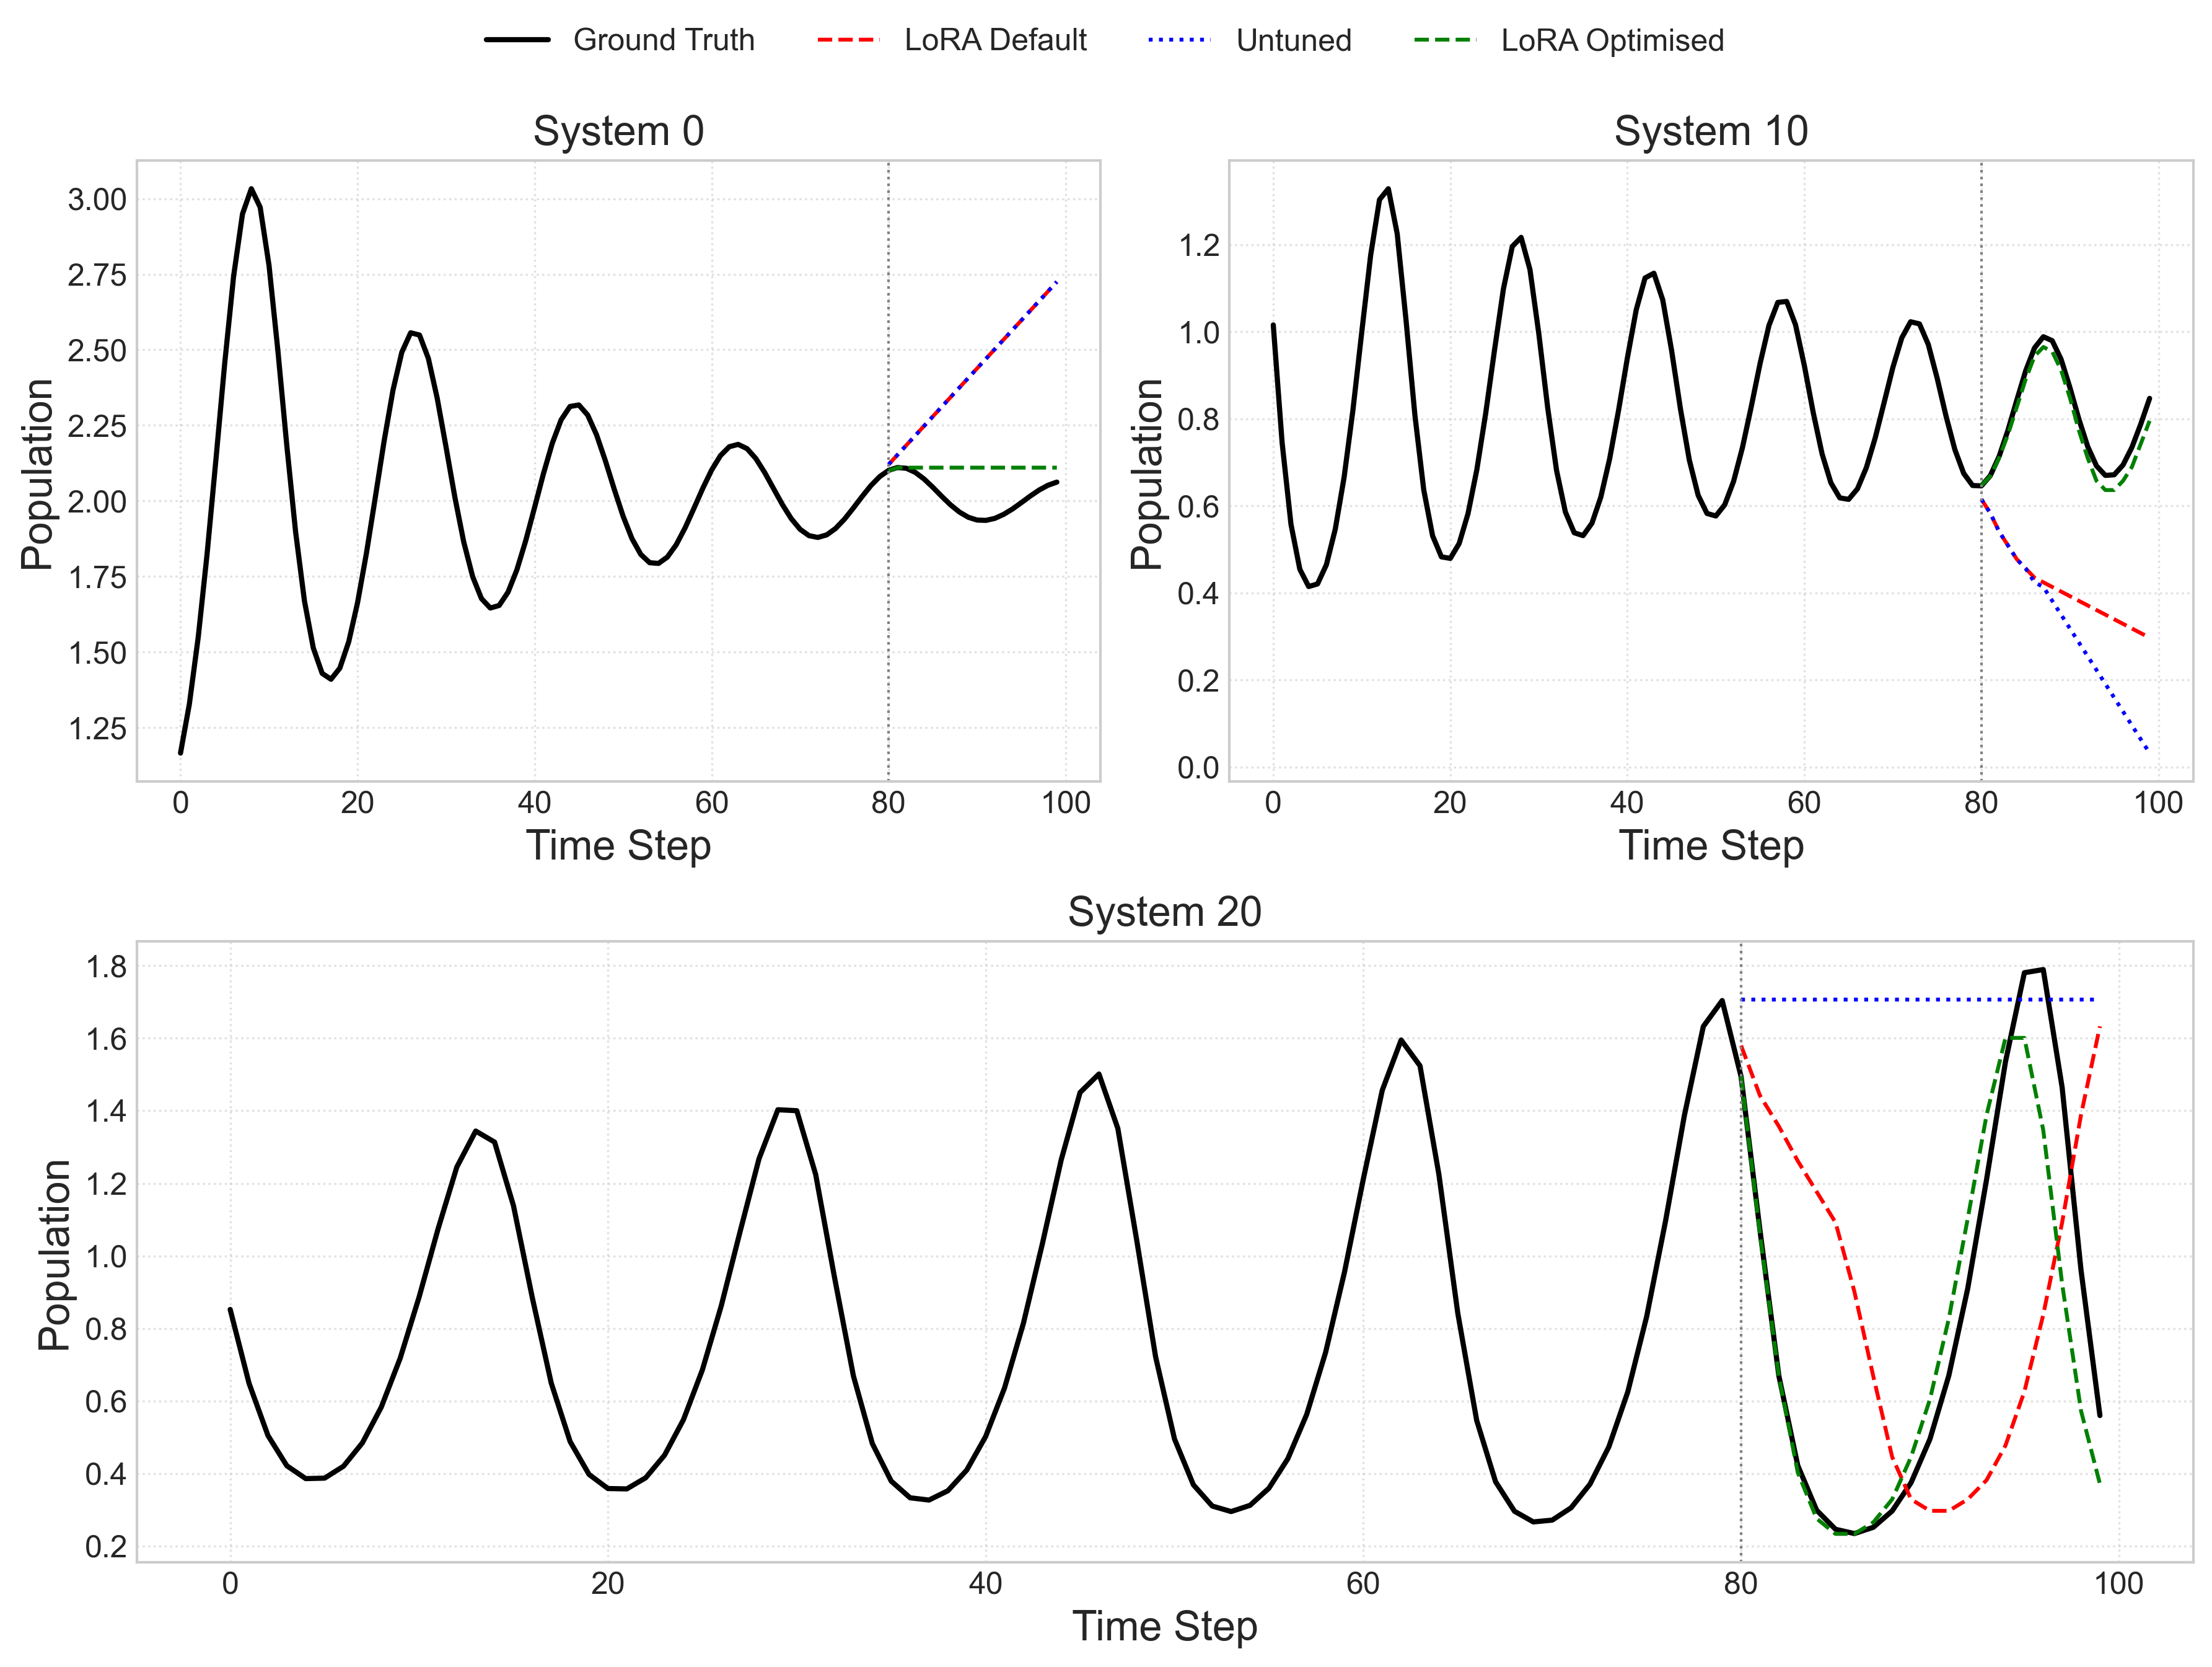

In [16]:
def plot_true_prediction(ax, trajectory, untrained, lora, finetuned, index):
    """
    Plot the true trajectory and predictions on a given Axes object.
    """
    forecast_range = torch.arange(80, 100)

    ax.plot(torch.arange(0, 100), trajectory, label='Ground Truth', color='black', linewidth=2,)
    ax.plot(forecast_range, lora, label='LoRA Default', linestyle='--', color='red')
    ax.plot(forecast_range, untrained, label='Untuned', linestyle=':', color='blue')
    ax.plot(forecast_range, finetuned, label='LoRA Optimised', linestyle='--', color='green')

    ax.axvline(x=80, color='gray', linestyle=':', linewidth=1)
    ax.set_title(f"System {index}", fontsize=16)
    ax.set_xlabel("Time Step", fontsize=16)
    ax.set_ylabel("Population", fontsize=16)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle=':', alpha=0.6)

# Load data
trajectories = load_trajectories("../data/lotka_volterra_data.h5")
val_trajectories = trajectories[850:]

preds_untrained = torch.load("../output_data/config_0/predict_80.pt")
preds_lora = torch.load("../output_data/config_1/predict_80.pt")
preds_lora_finetuned = torch.load("../output_data/config_13/predict_80.pt")

INDICES = [0, 10, 20]

# Set up GridSpec for custom layout
fig = plt.figure(figsize=(12, 9), dpi=300)
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# Top row: two side-by-side subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Bottom row: one subplot spanning both columns
ax2 = fig.add_subplot(gs[1, :])

AXES = [ax0, ax1, ax2]

# Plot data
for idx, i in enumerate(INDICES):
    trajectory = val_trajectories[i, :, 0]
    pred_untrained = preds_untrained[i, :, 0]
    pred_lora = preds_lora[i, :, 0]
    pred_lora_finetuned = preds_lora_finetuned[i, :, 0]
    plot_true_prediction(AXES[idx], trajectory, pred_untrained, pred_lora, pred_lora_finetuned, i)

# Shared legend
handles, labels = AXES[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

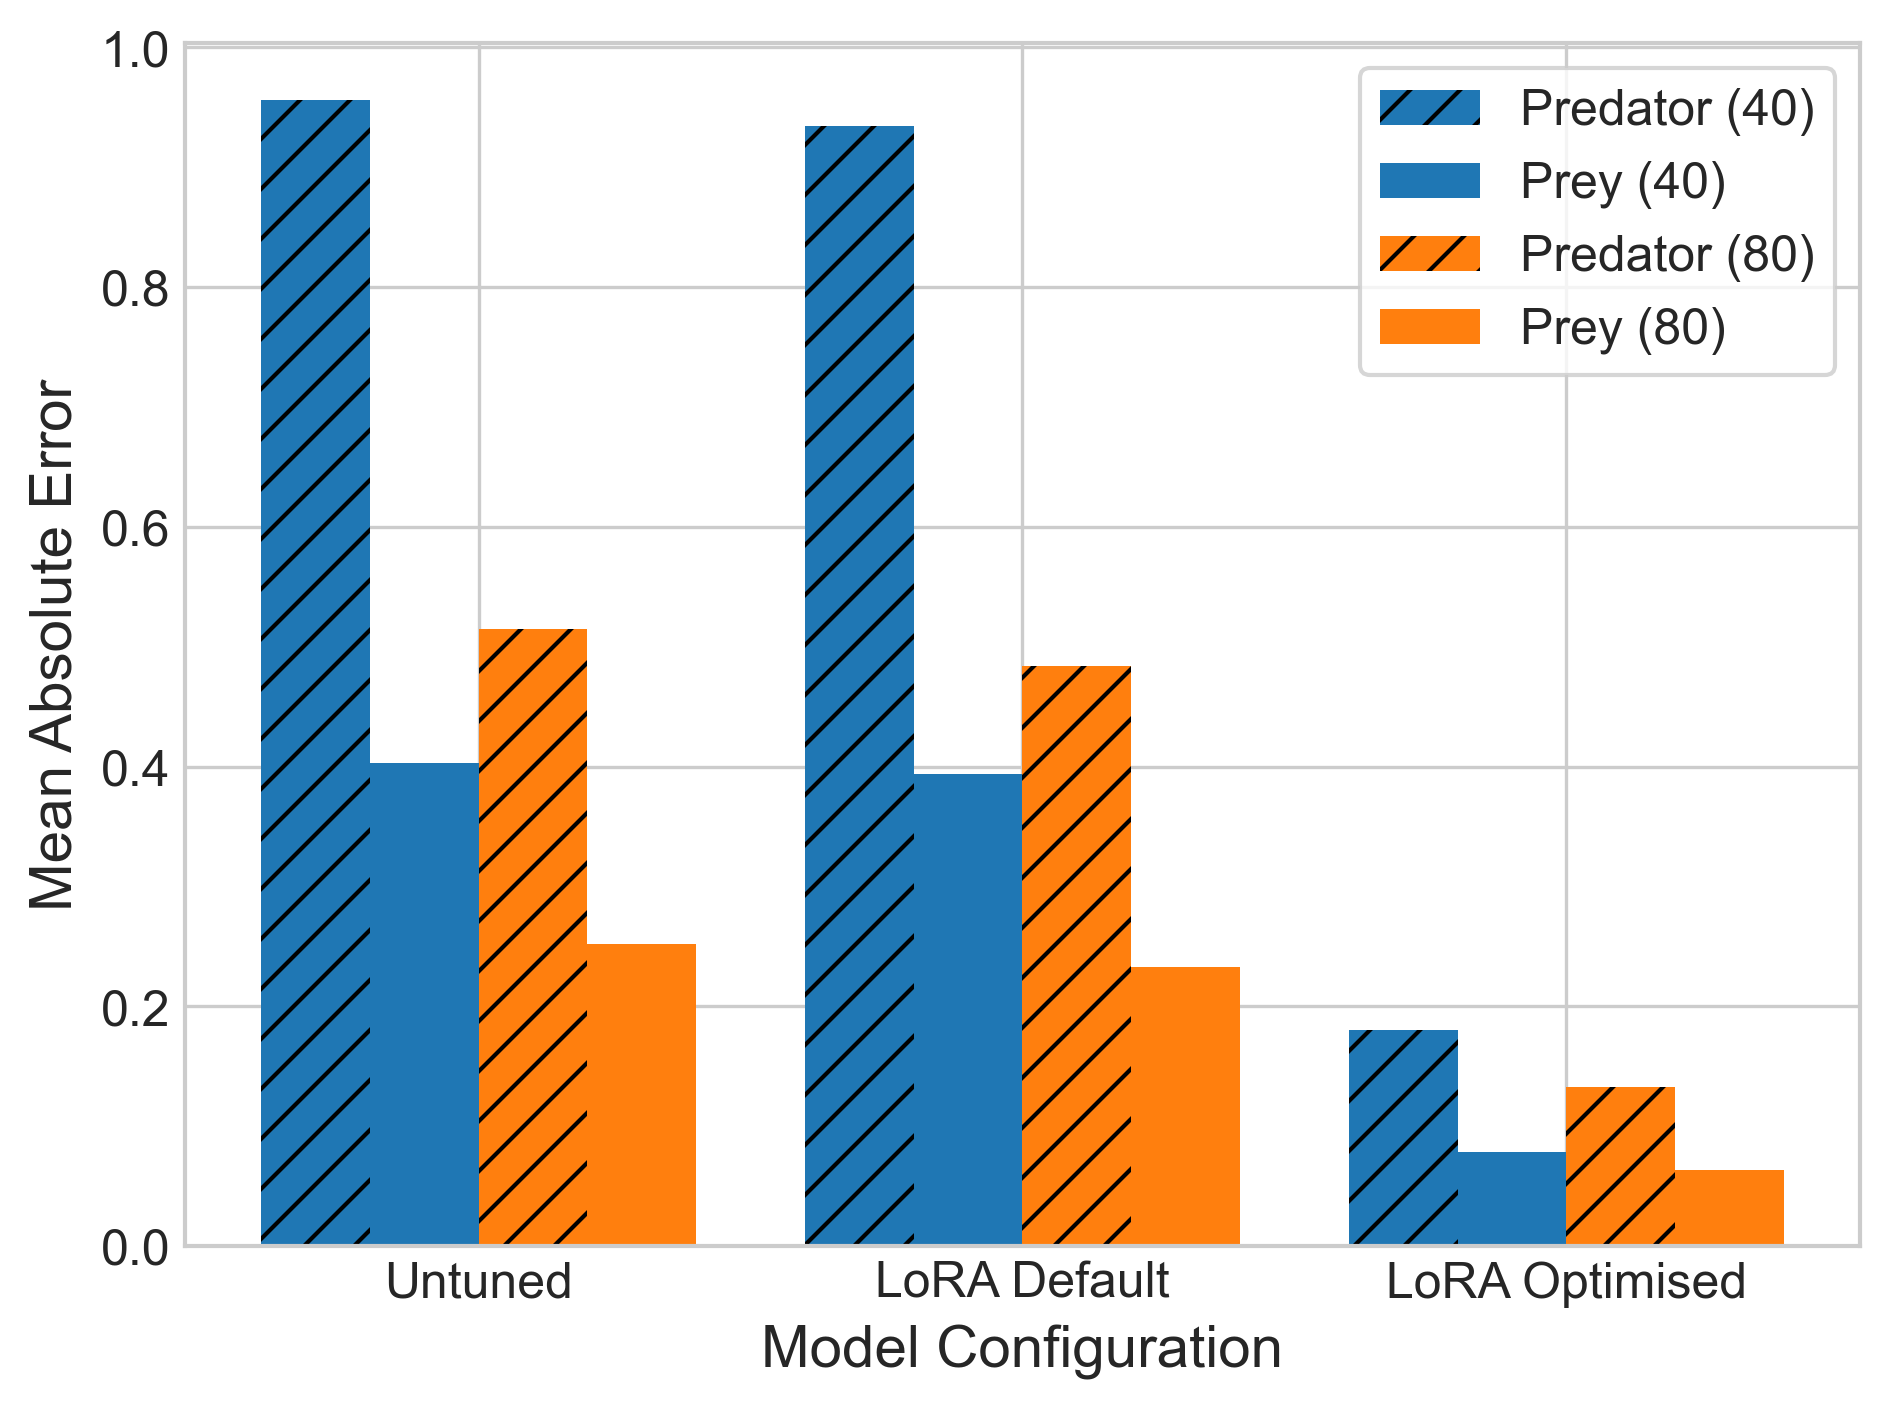

In [3]:
# Sample data for illustration
scenarios = ['Untuned', 'LoRA Default', 'LoRA Optimised']
pred_40_mae = [0.956, 0.934, 0.180]
prey_40_mae = [0.403, 0.394, 0.079]
pred_80_mae = [0.515, 0.484, 0.133]
prey_80_mae = [0.252, 0.233, 0.064]

# Combine data
bar_width = 0.2
x = np.arange(len(scenarios))

# Set style
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(dpi=300)

# Plot bars
plt.bar(x - 1.5 * bar_width, pred_40_mae, width=bar_width, color="#1f77b4", label="Predator (40)", hatch='//')
plt.bar(x - 0.5 * bar_width, prey_40_mae, width=bar_width, color="#1f77b4", label="Prey (40)")
plt.bar(x + 0.5 * bar_width, pred_80_mae, width=bar_width, color="#ff7f0e", label="Predator (80)", hatch='//')
plt.bar(x + 1.5 * bar_width, prey_80_mae, width=bar_width, color="#ff7f0e", label="Prey (80)")

# Axis labels and ticks
plt.xlabel("Model Configuration", fontsize=14)
plt.ylabel("Mean Absolute Error", fontsize=14)
plt.xticks(ticks=x, labels=scenarios, fontsize=12)
plt.yticks(fontsize=12)

# Legend and layout
plt.legend(fontsize=12, title_fontsize=13, frameon=True)
plt.tight_layout()
plt.show()
